In [1]:
import pandas as pd

# Cargar únicamente la columna 'host_id' del archivo CSV
file_path = "../0_Dataset/Listings.csv"
data = pd.read_csv(file_path, usecols=['host_id'], delimiter=',', encoding='latin-1')

# Verificar si la columna 'Review_scores_accuracy' existe en el DataFrame
if 'host_id' in data.columns:
    # Tipo de dato
    tipo_dato = data['host_id'].dtype
    
    # Cantidad de nulos
    cantidad_nulos = data['host_id'].isna().sum()
    
    # Cantidad de vacíos (considerando cadenas vacías)
    cantidad_vacios = (data['host_id'] == '').sum()
    
    # Cantidad de datos únicos
    cantidad_unicos = data['host_id'].nunique()
    
    # Cantidad de datos totales
    cantidad_totales = data['host_id'].shape[0]
    
    # Imprimir resultados
    print(f"Columna 'host_id':")
    print(f" - Tipo de dato: {tipo_dato}")
    print(f" - Cantidad de nulos: {cantidad_nulos}")
    print(f" - Cantidad de vacíos: {cantidad_vacios}")
    print(f" - Cantidad de datos únicos: {cantidad_unicos}")
    print(f" - Cantidad de datos totales: {cantidad_totales}")
else:
    print("La columna 'host_id' no existe en el DataFrame.")

print(data['host_id'].value_counts())
print(data['host_id'].unique())

Columna 'host_id':
 - Tipo de dato: int64
 - Cantidad de nulos: 0
 - Cantidad de vacíos: 0
 - Cantidad de datos únicos: 182024
 - Cantidad de datos totales: 279712
host_id
291007369    627
175128252    396
7518056      378
97240131     339
371026651    295
            ... 
16023084       1
23197732       1
22260507       1
24570082       1
6955618        1
Name: count, Length: 182024, dtype: int64
[ 1466919 10328771 19252768 ...  2238502 38633695  6955618]


In [2]:
# Cantidad de filas antes de aplicar dropna
total_antes = data['host_id'].shape[0]

# Filtrar valores válidos
valores_validos = data['host_id'].dropna()

# Cantidad de filas después de aplicar dropna
total_despues = valores_validos.shape[0]

# Calcular cuántos valores se dropearon
valores_dropeados = total_antes - total_despues

# Imprimir el resultado
print(f"Cantidad de valores eliminados (dropeados): {valores_dropeados}")

if not valores_validos.empty:
    # Cálculo de estadísticas sin transformar a escala relativa
    promedio = valores_validos.mean()
    minimo = valores_validos.min()
    maximo = valores_validos.max()
    desviacion = valores_validos.std()
    varianza = valores_validos.var()
    q1 = valores_validos.quantile(0.25)
    q2 = valores_validos.quantile(0.50)  # Mediana
    q3 = valores_validos.quantile(0.75)
    q4 = valores_validos.quantile(1.0)
    mediana = valores_validos.median()
    kurtosis = valores_validos.kurtosis()
    skewness = valores_validos.skew()

    # Mostrar resultados
    print("\nAnálisis Cuantitativo de 'host_id':")
    print(f" - Promedio: {promedio:.2f}")
    print(f" - Mínimo: {minimo}")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Varianza: {varianza:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Q4 (100%): {q4}")
    print(f" - Mediana: {mediana}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar un análisis cuantitativo.")

Cantidad de valores eliminados (dropeados): 0

Análisis Cuantitativo de 'host_id':
 - Promedio: 108165773.09
 - Mínimo: 1822
 - Máximo: 390187445
 - Desviación estándar: 110856993.22
 - Varianza: 12289272944869604.00
 - Q1 (25%): 17206558.0
 - Q2 / Mediana (50%): 58269113.5
 - Q3 (75%): 183285318.75
 - Q4 (100%): 390187445.0
 - Mediana: 58269113.5
 - Curtosis (Kurtosis): -0.3624
 - Asimetría (Skewness): 0.9554


Total de registros: 279712
IDs únicos: 182024
Duplicados: 97688


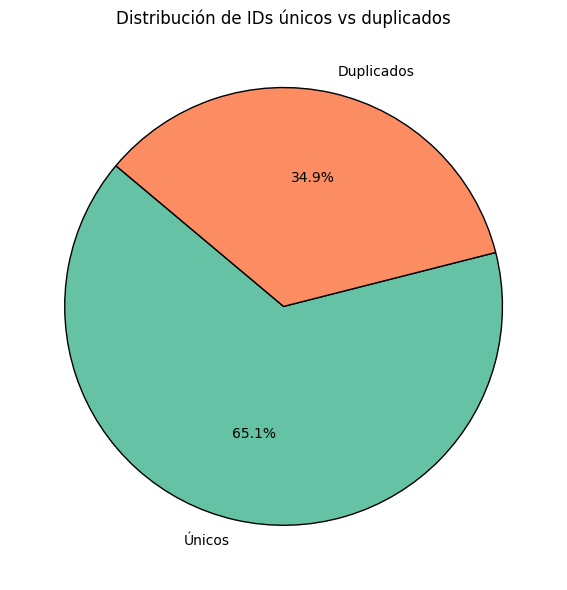

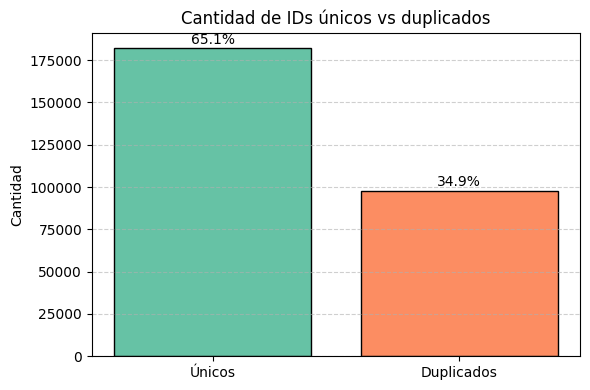

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# Calcular totales
total = len(data)
unicos = data['host_id'].nunique()
duplicados = total - unicos

print(f"Total de registros: {total}")
print(f"IDs únicos: {unicos}")
print(f"Duplicados: {duplicados}")

# Gráfico de pastel
labels = ['Únicos', 'Duplicados']
values = [unicos, duplicados]
colors = ['#66c2a5', '#fc8d62']

plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Distribución de IDs únicos vs duplicados')
plt.tight_layout()
plt.show()

# Gráfico de barras (opcional)
plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=colors, edgecolor='black')
plt.title('Cantidad de IDs únicos vs duplicados')
plt.ylabel('Cantidad')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar porcentaje encima de cada barra
for i, v in enumerate(values):
    porcentaje = (v / total) * 100
    plt.text(i, v + total * 0.01, f'{porcentaje:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

ANALISIS CUALITATIVO LIMPIEZA

In [4]:
# Ver cuántos hosts únicos hay
print("Total de host_id únicos:", data['host_id'].nunique())

# Ver cuántas veces se repite cada host
repetidos = data['host_id'].value_counts()
print(repetidos.head())  # ver los más repetidos

# Verificar duplicados exactos (todas las columnas)
duplicados = data.duplicated()
print("Cantidad de registros completamente duplicados:", duplicados.sum())

Total de host_id únicos: 182024
host_id
291007369    627
175128252    396
7518056      378
97240131     339
371026651    295
Name: count, dtype: int64
Cantidad de registros completamente duplicados: 97688
